Epoch 1/30


C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_9140\1382448601.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[features] = df[features].fillna(method='ffill').fillna(method='bfill')
C:\Users\Hassan Laptop Point\AppData\Local\Temp\ipykernel_9140\1382448601.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[TARGET] = df[TARGET].fillna(method='ffill').fillna(method='bfill')
C:\Users\Hassan Laptop Point\anaconda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1573 - val_loss: 0.0950
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0567 - val_loss: 0.0719
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0411 - val_loss: 0.0365
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0253 - val_loss: 0.0060
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - val_loss: 0.0032
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - val_loss: 8.0526e-04
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0111 - val_loss: 4.9735e-04
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0103 - val_loss: 4.9445e-04
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0103 - val_loss: 8.0527e-04
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0078 - val_loss: 4.5535e-04
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0075 - val_loss: 7.1758e-04
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/ste

C:\Users\Hassan Laptop Point\anaconda4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1248 - val_loss: 0.0331
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.0442
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - val_loss: 0.0232
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - val_loss: 0.0224
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - val_loss: 0.0276
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 
LSTM RMSE: 4.0703059754904105
CNN RMSE: 5.749908986454003


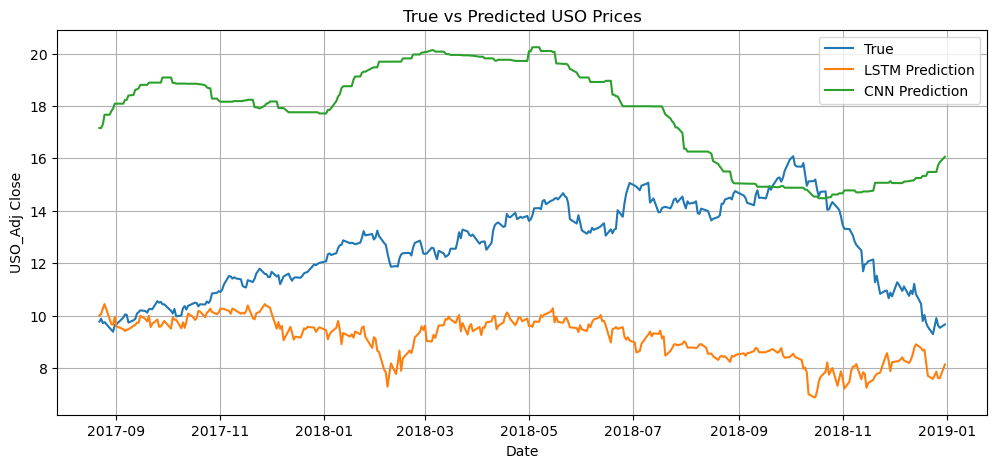

In [4]:
###############################################
# COMPLETE CNN + LSTM TIME-SERIES MODEL SCRIPT
###############################################

# Install dependencies (comment out if already installed)
!pip install -q tensorflow pandas scikit-learn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping


# ============================================
# LOAD DATA
# ============================================
CSV_PATH = "FINAL_USO_cleaned.csv"   # <-- make sure file is next to notebook
TARGET = "USO_Adj Close"
SEQ_LEN = 30

df = pd.read_csv(CSV_PATH, parse_dates=['Date'])
df = df.sort_values("Date").reset_index(drop=True)


# ============================================
# SELECT FEATURES
# ============================================
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove(TARGET)

# Use up to 10 numeric features
features = numeric_cols[:10]


# ============================================
# DATA CLEANING + SCALING
# ============================================
df[features] = df[features].fillna(method='ffill').fillna(method='bfill')
df[TARGET] = df[TARGET].fillna(method='ffill').fillna(method='bfill')

sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

X_all = sc_X.fit_transform(df[features])
y_all = sc_y.fit_transform(df[[TARGET]])


# ============================================
# CREATE SEQUENCES
# ============================================
def create_sequences(X, y, seq_len):
    Xs, ys = [], []
    for i in range(seq_len, len(X)):
        Xs.append(X[i-seq_len:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(X_all, y_all, SEQ_LEN)


# ============================================
# TRAIN / TEST SPLIT (TIME-BASED)
# ============================================
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# ============================================
# LSTM MODEL
# ============================================
lstm = Sequential([
    LSTM(32, input_shape=(SEQ_LEN, X.shape[2])),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])

lstm.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[es],
    verbose=1
)


# ============================================
# 1D CNN MODEL
# ============================================
cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, X.shape[2])),
    Conv1D(16, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dense(1)
])

cnn.compile(optimizer='adam', loss='mse')

cnn.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    callbacks=[es],
    verbose=1
)


# ============================================
# EVALUATION
# ============================================
pred_lstm = lstm.predict(X_test)
pred_cnn = cnn.predict(X_test)

y_test_inv = sc_y.inverse_transform(y_test)
lstm_inv = sc_y.inverse_transform(pred_lstm)
cnn_inv = sc_y.inverse_transform(pred_cnn)

rmse_lstm = math.sqrt(mean_squared_error(y_test_inv, lstm_inv))
rmse_cnn = math.sqrt(mean_squared_error(y_test_inv, cnn_inv))

print("====================================")
print("LSTM RMSE:", rmse_lstm)
print("CNN RMSE:", rmse_cnn)
print("====================================")


# ============================================
# PLOT RESULTS
# ============================================
dates_test = df["Date"].iloc[SEQ_LEN+split : SEQ_LEN+split+len(y_test)]

plt.figure(figsize=(12,5))
plt.plot(dates_test, y_test_inv, label="True")
plt.plot(dates_test, lstm_inv, label="LSTM Prediction")
plt.plot(dates_test, cnn_inv, label="CNN Prediction")
plt.xlabel("Date")
plt.ylabel("USO_Adj Close")
plt.title("True vs Predicted USO Prices")
plt.legend()
plt.grid()
plt.show()

###############################################
# END OF COMPLETE SCRIPT
###############################################